# Imports

In [1]:
import os
import pathlib
import sys
from pathlib import __file__
import cv2

sys.path.insert(0, pathlib.Path().absolute().parent.parent.parent.__str__())
sys.path.append(os.path.join(os.path.dirname(__file__), "../../../../src"))

sys.dont_write_bytecode = True

from utils.holistic.holistic_detector import HolisticDetector
from utils.landmarks.pose_info import PoseInfo
from utils.landmarks.hand_info import HandInfo, Hand

In [2]:
from matplotlib import pyplot as plt
#%matplotlib widget

# 1. Obtener imagen para trabajar

In [3]:
holistic = HolisticDetector()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


<class 'mediapipe.python.solution_base.SolutionOutputs'>


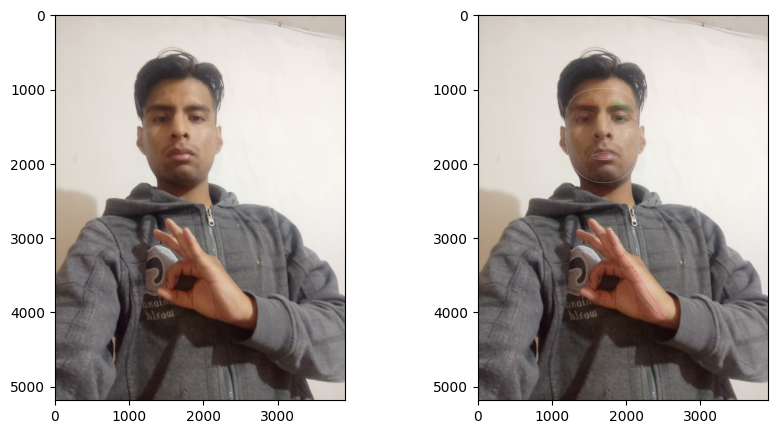

In [4]:
if True:
    # Image
    cap = cv2.imread("../../data/raw/Signs/Sabado/IMG_20220813_093348.jpg")
    frame = cap

    # Make detections
    results = holistic.detect_holistic(frame)
    print(results)

    # Draw landmarks
    frame_pred = holistic.draw_prediction(frame, results)
    
    # Show both images
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.imshow(cv2.cvtColor(frame_pred, cv2.COLOR_BGR2RGB))
    plt.show()
else:
    cap = cv2.VideoCapture(1)
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        results = holistica.detectar_holistica(frame)
        #print(results)
        
        # Draw landmarks
        frame_pred = holistica.dibujar_prediccion(frame, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', frame_pred)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

# 2. Preparar datos

In [5]:
pose_info = PoseInfo(results)
right_hand_info = HandInfo(results, hand=Hand.RIGHT)
left_hand_info = HandInfo(results, hand=Hand.LEFT)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

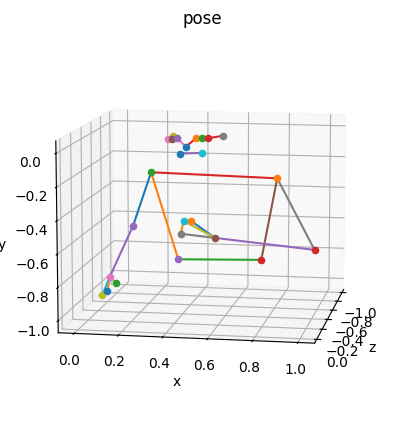

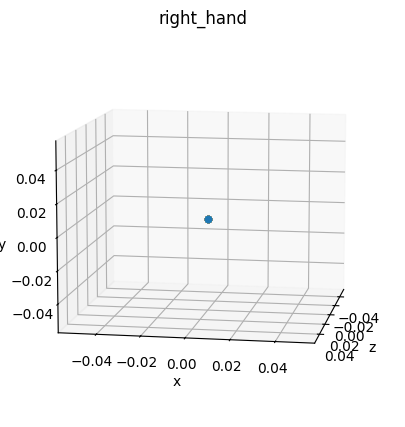

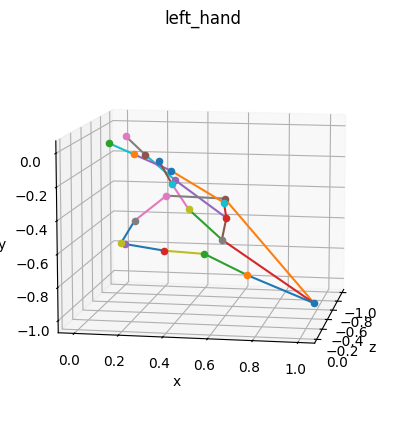

In [6]:
pose_info.plot_landmark()
right_hand_info.plot_landmark()
left_hand_info.plot_landmark()

# 3. Data Augmentation

In [7]:
new_pose_configs = pose_info.data_aug_coords(axies_to_rotate=["x", "y", "z"])
new_right_hand_configs = right_hand_info.data_aug_coords(axies_to_rotate=["x", "y", "z"])
new_left_hand_configs = left_hand_info.data_aug_coords(axies_to_rotate=["x", "y", "z"])


In [8]:
len(new_pose_configs), len(new_right_hand_configs), len(new_left_hand_configs)

(27, 27, 27)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

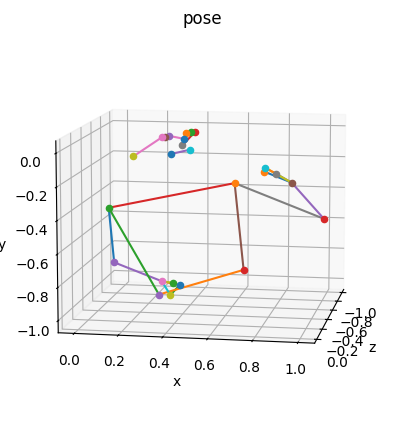

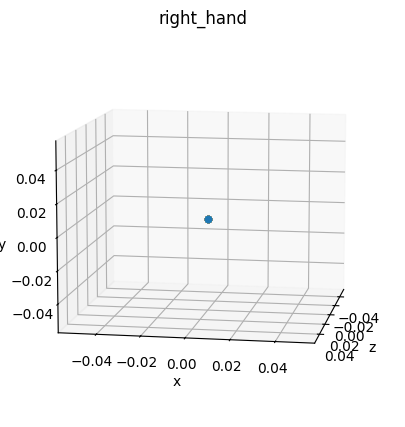

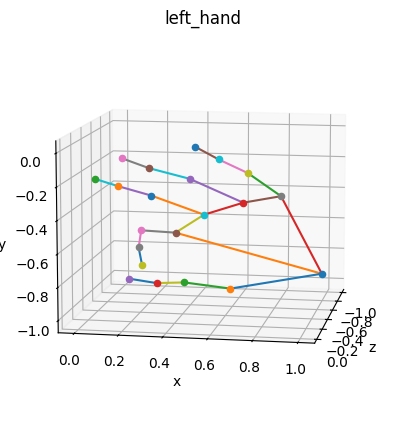

In [9]:
new_pose_configs[-15].plot_landmark()
new_right_hand_configs[-15].plot_landmark()
new_left_hand_configs[-15].plot_landmark()